In [13]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
class Planeta:
    step=0
    area_blanca = []
    area_negra =[]
    def __init__(self,plantas, albedo_f, luminosidad, prop_fertil = 0.98, q = 15, boltz = 5.67e-8):
        self.blanca = plantas[0]
        self.negra = plantas[1]       
        self.albedo_f = albedo_f
        self.luminosidad = luminosidad
        self.boltz = boltz
        self.albedo_p = None
        self.temp_g = None
        self.q = q
        self.prop_fertil = prop_fertil
        self.step = 0
        
    def actualiza_temp_g(self):
        self.temp_g = ((self.luminosidad[self.step]/(self.boltz))*(1 - self.albedo_p))**0.25 
        print self.temp_g
    
    def actualiza_albedo_p(self):
        self.prop_fertil = 1 - self.blanca.prop_area - self.negra.prop_area
        self.albedo_p = self.blanca.prop_area * self.blanca.albedo + self.negra.prop_area * self.negra.albedo + self.prop_fertil * self.albedo_f
        print self.albedo_p
        
    def vivir(self):
        for i in self.luminosidad:
            self.actualiza_albedo_p()
            self.actualiza_temp_g()
            self.blanca.actualizar(self)
            self.negra.actualizar(self)
            self.area_blanca.append(blanca.prop_area)
            self.area_negra.append(negra.prop_area)
            self.step += 1
        
        
    def iam(self):
        print "TEMPERATUA GLOBAL: " + str(self.temp_g) + " ALBEDO GLOBAL: " + str(self.albedo_p)
        print "PROPORCION FERTIL: " + str(self.prop_fertil)
        print "STEP " + str(self.step)
        print "AREA NEGRAS:"
        for i in self.area_blanca:
            print i
        print "AREAS BLANCAS:"
        for i in self.area_negra:
            print i
        
        
    def grafica(self):
        plt.plot(self.luminosidad,self.area_blanca)
        plt.plot(self.luminosidad,self.area_negra)
    
    
    
    

        

In [37]:
class Planta:
    dif_area =0
    temp_l=0
    tasa_cre = 0
    def __init__(self,color, albedo, prop_area = 0.01, tasa_muerte = 0.1
               ,superior = 313, inferior = 278):
        self.color = color
        self.albedo = albedo
        self.prop_area = prop_area
        self.tasa_muerte = tasa_muerte
        self.superior = superior
        self.inferior = inferior
        

        
    def actualiza_temp_l(self, mundo):
        self.temp_l = mundo.q * (mundo.albedo_p - self.albedo) + mundo.temp_g
        print self.color + " : " + str(self.temp_l)
        
    def actualiza_taza_cre(self):
        if self.temp_l > self.inferior and self.temp_l < self.superior :
            self.tasa_cre = (self.temp_l - self.inferior) * (self.superior - self.temp_l) * 4 / (self.inferior -self.superior)**2
            print "TASA DE CRECIMIENTO "+ str(self.tasa_cre)
        else:
            self.tasa_cre = 0
                
            
    def actualiza_area(self,mundo):
        self.dif_area = self.prop_area*(self.tasa_cre * mundo.prop_fertil - self.tasa_muerte)
        print "El difrencial de area" + str(self.dif_area)
        self.prop_area = self.prop_area  + self.dif_area
        if self.prop_area <= 0.01:
            self.prop_area = 0.01
        if self.prop_area >= .99:
            self.prop_area = .99

    def actualizar(self,mundo):
        self.actualiza_temp_l(mundo)
        self.actualiza_taza_cre()
        self.actualiza_area(mundo)
    
    def iam(self):
        print "COLOR: " + self.color + " ALBEDO: " + str(self.albedo)
        print "TASA DE MUERTE: " + str(self.tasa_muerte) + " TASA DE CRECIMIENTO: " + str(self.tasa_cre)
        print "TEMPERATURA LOCAL:" + str(self.temp_l) 
        print "AREA " + str(self.prop_area)
        
        



In [38]:
negra = Planta("negra",.25)
blanca = Planta("blanca",.75)

In [39]:
luminosidad = np.linspace(.6,1.8,100)

In [40]:
luminosidad *=1000


In [41]:
luminosidad

array([  600.        ,   612.12121212,   624.24242424,   636.36363636,
         648.48484848,   660.60606061,   672.72727273,   684.84848485,
         696.96969697,   709.09090909,   721.21212121,   733.33333333,
         745.45454545,   757.57575758,   769.6969697 ,   781.81818182,
         793.93939394,   806.06060606,   818.18181818,   830.3030303 ,
         842.42424242,   854.54545455,   866.66666667,   878.78787879,
         890.90909091,   903.03030303,   915.15151515,   927.27272727,
         939.39393939,   951.51515152,   963.63636364,   975.75757576,
         987.87878788,  1000.        ,  1012.12121212,  1024.24242424,
        1036.36363636,  1048.48484848,  1060.60606061,  1072.72727273,
        1084.84848485,  1096.96969697,  1109.09090909,  1121.21212121,
        1133.33333333,  1145.45454545,  1157.57575758,  1169.6969697 ,
        1181.81818182,  1193.93939394,  1206.06060606,  1218.18181818,
        1230.3030303 ,  1242.42424242,  1254.54545455,  1266.66666667,
      

In [42]:
plantas = [negra,blanca]

In [43]:
primer_intento = Planeta(plantas, 0.5,luminosidad)

In [44]:
primer_intento.vivir()

0.5
269.70223719
negra : 273.45223719
El difrencial de area-0.001
blanca : 265.95223719
El difrencial de area-0.001
0.5
271.054170458
negra : 274.804170458
El difrencial de area-0.001
blanca : 267.304170458
El difrencial de area-0.001
0.5
272.386172092
negra : 276.136172092
El difrencial de area-0.001
blanca : 268.636172092
El difrencial de area-0.001
0.5
273.698914556
negra : 277.448914556
El difrencial de area-0.001
blanca : 269.948914556
El difrencial de area-0.001
0.5
274.993035337
negra : 278.743035337
TASA DE CRECIMIENTO 0.0831155437952
El difrencial de area-0.000185467670807
blanca : 271.243035337
El difrencial de area-0.001
0.5
276.269139376
negra : 280.019139376
TASA DE CRECIMIENTO 0.217446381514
El difrencial de area0.00113097453883
blanca : 272.519139376
El difrencial de area-0.001
0.499717256365
277.567027586
negra : 281.312786432
TASA DE CRECIMIENTO 0.342768885462
El difrencial de area0.00262163218249
blanca : 273.812786432
El difrencial de area-0.001
0.49906184832
278.900

In [45]:
primer_intento.iam()

TEMPERATUA GLOBAL: 334.656136732 ALBEDO GLOBAL: 0.604901185287
PROPORCION FERTIL: 0.560395258851
STEP 100
AREA NEGRAS:
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.01
0.0106963038565
0.0132857626934
0.0186907495711
0.0285483765815
0.0433230100226
0.0583253784119
0.0697608209893
0.0800710025025
0.0912616529141
0.104391660631
0.12015174141
0.139059032444
0.161479478857
0.187561766851
0.217119487176
0.249505608922
0.283554971023
0.317692023739
0.350254684358
0.379940680276
0.406137802222
0.428940917008
0.448894080243
0.466671874127
0.48286894009
0.497924851747
0.512132119156
0.525673601058
0.538660291586
0.551159822686
0.563215170276
0.574855900904
0.586104492956
0.596979678742
0.607498103258
0.617675090364
0.627524967283
0.637061188734
0.646296381293
0.65524236325
0.663910162213
0.672310037256
0.680451505986
0.688343374742
0.695993769824
0.703410167949
0.710599424613
0.717567799436
0.724320977836
0.730864088601
0.737201716971
0.743337912892
0.74927619404
0.755019543141
0.760570398948
0

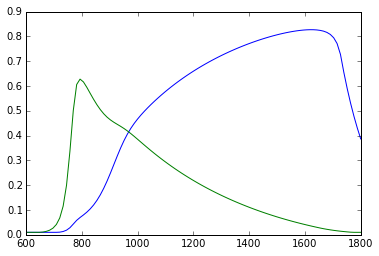

In [46]:
primer_intento.grafica()